Apply all the Regression types of Machine Learning Algorithm to the attached Dataset.
Like : 
Multiple Linear Regression
KNN Regressor
Decision Tree Regressor
Random Forest Regressor
Adaboost Regressor

Columns  : Rooms, Price, distance, postcode, property_count

Make sure to take only the Numerical Columns and ignore the categorical columns.

And the price is your output column.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
# now we will ignore the warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
ds=pd.read_csv("/Users/yshaik/Desktop/DataScienceCourse/Melbourne_housing_FULL.csv")
ds.head(3)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0


In [3]:
ds1=ds[["Rooms", "Price", "Distance", "Postcode", "Propertycount"]].copy()

In [4]:
ds1.head()

,Rooms,Price,Distance,Postcode,Propertycount
0,2,NaN,2.5,3067.0,4019.0
1,2,1480000.0,2.5,3067.0,4019.0
2,2,1035000.0,2.5,3067.0,4019.0
3,3,NaN,2.5,3067.0,4019.0
4,3,1465000.0,2.5,3067.0,4019.0


In [5]:
ds1.describe()

,Rooms,Price,Distance,Postcode,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,21650.000000


In [6]:
ds1.shape

(34857, 5)

In [7]:
ds1.isnull().sum()

Rooms               0
Price            7610
Distance            1
Postcode            1
Propertycount       3
dtype: int64

In [8]:
ds1[ds1["Distance"]==ds1["Distance"].isnull()]

,Rooms,Price,Distance,Postcode,Propertycount
15114,2,NaN,0.0,3000.0,17496.0
15115,2,850000.0,0.0,3000.0,17496.0
15774,2,740000.0,0.0,3000.0,17496.0
15775,1,NaN,0.0,3000.0,17496.0
15776,2,820000.0,0.0,3000.0,17496.0
...,...,...,...,...,...
33516,1,415000.0,0.0,3000.0,17496.0
33517,2,1260000.0,0.0,3000.0,17496.0
33518,2,650000.0,0.0,3000.0,17496.0
34471,2,NaN,0.0,3000.0,17496.0


#### Null values Treatment


'''
#ds1["Price"].fillna(ds1["Price"].mean(),inplace=True)
ds1["Distance"].fillna(ds1["Distance"].ffill(),inplace=True)
ds1["Postcode"].fillna(ds1["Postcode"].ffill(),inplace=True)
ds1["Propertycount"].fillna(ds1["Propertycount"].ffill(),inplace=True)



ds1.isnull().sum()


ds1["Distance"].ffill()
'''
# we can even impute the null values using KNN imputer as follows
from sklearn.impute import KNNImputer

impute_it=KNNImputer()

impute_it.fit_transformn(data_set)

In [9]:
ds1.head()

,Rooms,Price,Distance,Postcode,Propertycount
0,2,NaN,2.5,3067.0,4019.0
1,2,1480000.0,2.5,3067.0,4019.0
2,2,1035000.0,2.5,3067.0,4019.0
3,3,NaN,2.5,3067.0,4019.0
4,3,1465000.0,2.5,3067.0,4019.0


In [10]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

impute_it=IterativeImputer()
dsn=pd.DataFrame(impute_it.fit_transform(ds1),columns=["Rooms","Price","Distance","Postcode","Propertycount"])
dsn.head()

,Rooms,Price,Distance,Postcode,Propertycount
0,2.0,1.021950e+06,2.5,3067.0,4019.0
1,2.0,1.480000e+06,2.5,3067.0,4019.0
2,2.0,1.035000e+06,2.5,3067.0,4019.0
3,3.0,1.414468e+06,2.5,3067.0,4019.0
4,3.0,1.465000e+06,2.5,3067.0,4019.0


In [11]:
dsn.isnull().sum()

Rooms            0
Price            0
Distance         0
Postcode         0
Propertycount    0
dtype: int64

In [12]:
def univariate_num(data,x, bxplot=True, hist_graph=True):
    minn=data[x].min()
    maxx=data[x].max()
    stdd=data[x].std()
    meann=data[x].mean()
    q1=data[x].quantile(.25)
    q2=data[x].quantile(.5)
    q3=data[x].quantile(.75)
    iqr=q3-q1
    skewness=data[x].skew()
    
    if bxplot==True:
        sns.boxplot(y=data[x])
        plt.show()
    if hist_graph==True:
        sns.histplot(data=data, x=x)
        plt.show()
    result={"missing_value":data[x].isnull().sum(), 
           "min":minn,
           "max":maxx,
           "std":round(stdd, 2),
           "mean":round(meann, 2),
           "q1":round(q1,2),"q2":round(q2, 2), 
            "q3":round(q3,2), "iqr":round(iqr,2),"skewness":round(skewness,2)}
    return result

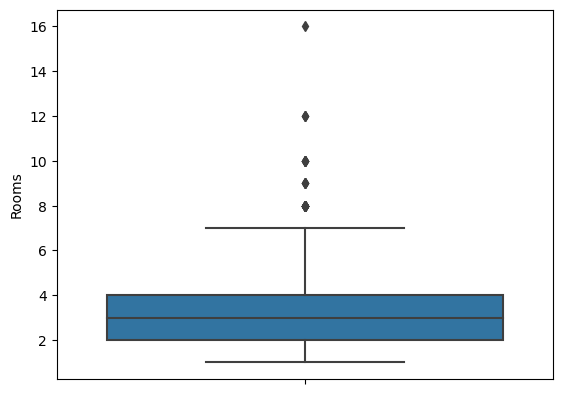

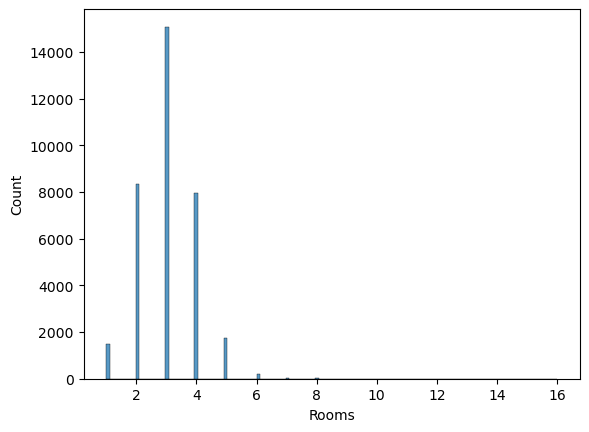

{'missing_value': 0,
 'min': 1.0,
 'max': 16.0,
 'std': 0.97,
 'mean': 3.03,
 'q1': 2.0,
 'q2': 3.0,
 'q3': 4.0,
 'iqr': 2.0,
 'skewness': 0.5}

In [13]:
univariate_num(dsn,x="Rooms",bxplot=True, hist_graph=True)

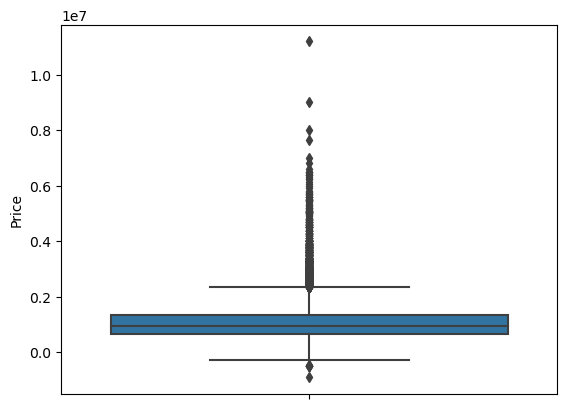

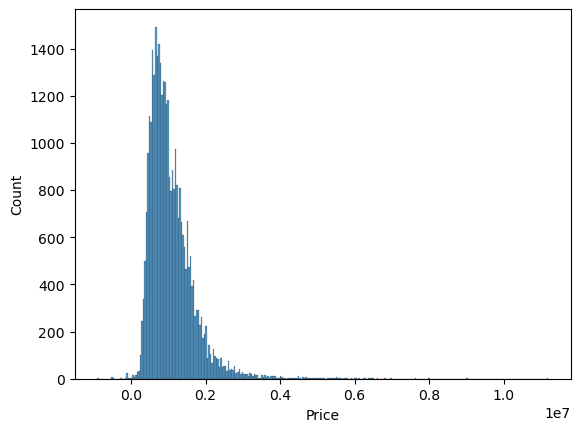

{'missing_value': 0,
 'min': -905426.492837647,
 'max': 11200000.0,
 'std': 603655.31,
 'mean': 1072972.76,
 'q1': 666000.0,
 'q2': 937000.0,
 'q3': 1333861.77,
 'iqr': 667861.77,
 'skewness': 2.4}

In [14]:
univariate_num(dsn,x="Price",bxplot=True, hist_graph=True)

########Outlier Treatment########################

In [15]:
ds1.describe(percentiles=[0,.001,.002,.01,.02,.03,.04,.05,.1,.25,.5,.75,.9, .95,.96,.97,.98,.99]).T

,count,mean,std,min,0%,0.1%,0.2%,1%,2%,3%,...,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
Rooms,34857.0,3.031012e+00,0.969933,1.0,1.0,1.0,1.0,1.00,1.00,1.0,...,2.0,3.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,16.0
Price,27247.0,1.050173e+06,641467.130105,85000.0,85000.0,223230.0,250000.0,310000.00,349000.00,373500.0,...,635000.0,870000.0,1295000.0,1800000.0,2250000.0,2390000.0,2600000.0,2857240.0,3400540.0,11200000.0
Distance,34856.0,1.118493e+01,6.788892,0.0,0.0,0.0,0.0,1.60,1.90,2.4,...,6.4,10.3,14.0,19.9,24.7,25.9,27.2,31.7,35.4,48.1
Postcode,34856.0,3.116063e+03,109.023903,3000.0,3000.0,3000.0,3000.0,3006.00,3011.00,3012.0,...,3051.0,3103.0,3156.0,3190.0,3204.0,3206.0,3207.0,3429.0,3754.0,3978.0
Propertycount,34854.0,7.572888e+03,4428.090313,83.0,83.0,394.0,534.0,881.19,1158.12,1490.0,...,4385.0,6763.0,10412.0,14577.0,15510.0,16166.0,17496.0,21650.0,21650.0,21650.0


<AxesSubplot:xlabel='Price', ylabel='Count'>

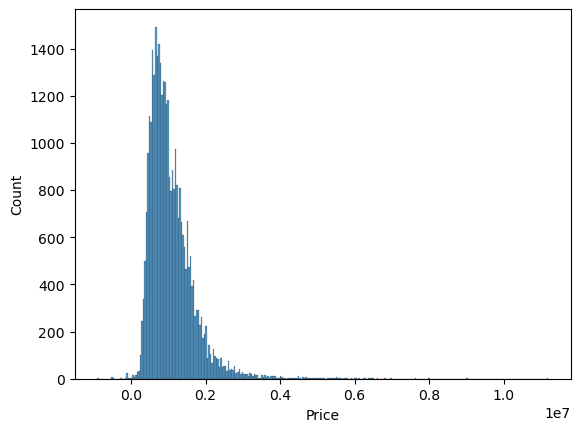

In [18]:
sns.histplot(dsn["Price"])

In [20]:
dsn.describe(percentiles=[0,.001,.002,.01,.02,.03,.04,.05,.1,.25,.5,.75,.9, .95,.96,.97,.98,.99]).T

,count,mean,std,min,0%,0.1%,0.2%,1%,2%,3%,...,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
Rooms,34857.0,3.031012e+00,0.969933,1.000000,1.000000,1.000000,1.000000,1.00,1.00,1.0,...,2.0,3.0,4.000000e+00,4.0,5.0,5.0,5.0,5.0,5.0,16.0
Price,34857.0,1.072973e+06,603655.311173,-905426.492838,-905426.492838,-81235.823689,123304.442526,300000.00,345000.00,375000.0,...,666000.0,937000.0,1.333862e+06,1755000.0,2110000.0,2250000.0,2425000.0,2720000.0,3230000.0,11200000.0
Distance,34857.0,1.118500e+01,6.788808,0.000000,0.000000,0.000000,0.000000,1.60,1.90,2.4,...,6.4,10.3,1.400000e+01,19.9,24.7,25.9,27.2,31.7,35.4,48.1
Postcode,34857.0,3.116063e+03,109.022339,3000.000000,3000.000000,3000.000000,3000.000000,3006.00,3011.00,3012.0,...,3051.0,3103.0,3.156000e+03,3190.0,3204.0,3206.0,3207.0,3429.0,3754.0,3978.0
Propertycount,34857.0,7.572911e+03,4427.900497,83.000000,83.000000,394.000000,534.000000,881.88,1158.24,1490.0,...,4385.0,6763.0,1.041200e+04,14577.0,15510.0,16166.0,17496.0,21650.0,21650.0,21650.0


In [28]:
def outlier_method2(x):
    x=x.clip(upper=x.quantile(.99))
    x=x.clip(lower=x.quantile(.002))
    return x

In [29]:
ds2=dsn.apply(outlier_method2)

In [30]:
ds2.describe(percentiles=[0,0.01,0.02,.03,.04,.05,.1,.25,.5,.75,.9, .95,.96,.97,.98,.99]).T

,count,mean,std,min,0%,1%,2%,3%,4%,5%,...,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
Rooms,34857.0,3.019451e+00,0.931046,1.000000,1.000000,1.00,1.00,1.0,1.0,2.0,...,2.0,3.0,4.000000e+00,4.0,5.0,5.0,5.0,5.0,5.0,5.0
Price,34857.0,1.064104e+06,552480.303779,123304.442526,123304.442526,300000.00,345000.00,375000.0,400000.0,420000.0,...,666000.0,937000.0,1.333862e+06,1755000.0,2110000.0,2250000.0,2425000.0,2720000.0,3230000.0,3230000.0
Distance,34857.0,1.113738e+01,6.588716,0.000000,0.000000,1.60,1.90,2.4,2.6,2.7,...,6.4,10.3,1.400000e+01,19.9,24.7,25.9,27.2,31.7,35.4,35.4
Postcode,34857.0,3.115450e+03,104.938178,3000.000000,3000.000000,3006.00,3011.00,3012.0,3013.0,3015.0,...,3051.0,3103.0,3.156000e+03,3190.0,3204.0,3206.0,3207.0,3429.0,3754.0,3754.0
Propertycount,34857.0,7.573196e+03,4427.440712,534.000000,534.000000,881.88,1158.24,1490.0,1808.0,2185.0,...,4385.0,6763.0,1.041200e+04,14577.0,15510.0,16166.0,17496.0,21650.0,21650.0,21650.0


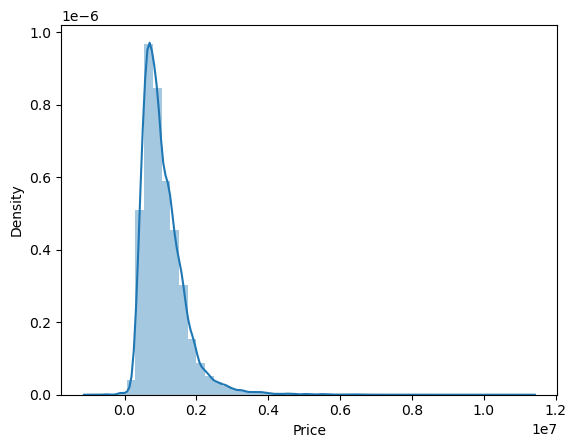

In [31]:
sns.distplot(dsn["Price"])
plt.show()

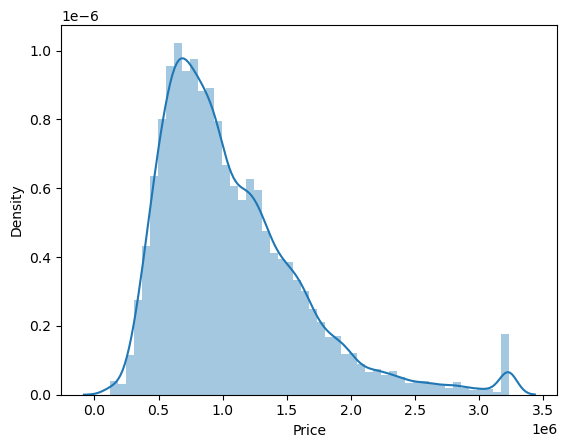

In [32]:
sns.distplot(ds2["Price"])
plt.show()

###############1. Linear Regression ####################
KNN Regressor#######
Decision Tree Regressor
Random Forest Regressor#
Adaboost Regressor

In [33]:
from scipy import stats 

In [34]:
#stats.shapiro(ds2["Price"]) # price is the target variable

ShapiroResult(statistic=0.8983874917030334, pvalue=0.0)

In [35]:
from scipy.stats import jarque_bera
stats.jarque_bera(ds2)

Jarque_beraResult(statistic=652034.9847426636, pvalue=0.0)

In [49]:
## pvalue is <0.05 therefore the target variable i.e data is largely deviated from normal distribution

In [37]:
from scipy.stats import skew

print(skew(ds2, axis=0, bias=True))


[0.07381996 1.38566724 1.26754026 3.70998034 0.99270332]


In [38]:
ds2.head(3)

,Rooms,Price,Distance,Postcode,Propertycount
0,2.0,1.021950e+06,2.5,3067.0,4019.0
1,2.0,1.480000e+06,2.5,3067.0,4019.0
2,2.0,1.035000e+06,2.5,3067.0,4019.0


Skewness = 0: Then normally distributed.
Skewness > 0: Then more weight in the left tail of the distribution.
Skewness < 0: Then more weight in the right tail of the distribution.

In [39]:
from scipy.stats import kurtosis

print(kurtosis(ds2, axis=0, bias=True))

print(kurtosis(ds2["Price"], axis=0, bias=True))

# Since Price kurtosis is less than 3,it is playkurtic. 

[-0.25790479  2.46135529  2.1332897  19.63664779  0.89097923]
2.4613552918736072


kurtosis for normal distribution is equal to 3.
For a distribution having kurtosis < 3: It is called playkurtic.
For a distribution having kurtosis > 3, It is called leptokurtic and it signifies that it tries to produce more outliers rather than the normal distribution.

########### Machine Implementation######################

In [40]:
from  sklearn.model_selection import train_test_split
ds2

,Rooms,Price,Distance,Postcode,Propertycount
0,2.0,1.021950e+06,2.5,3067.0,4019.0
1,2.0,1.480000e+06,2.5,3067.0,4019.0
2,2.0,1.035000e+06,2.5,3067.0,4019.0
3,3.0,1.414468e+06,2.5,3067.0,4019.0
4,3.0,1.465000e+06,2.5,3067.0,4019.0
...,...,...,...,...,...
34852,4.0,1.480000e+06,6.3,3013.0,6543.0
34853,2.0,8.880000e+05,6.3,3013.0,6543.0
34854,2.0,7.050000e+05,6.3,3013.0,6543.0
34855,3.0,1.140000e+06,6.3,3013.0,6543.0


In [41]:
y=ds2["Price"]
x=ds2.drop(columns=["Price"])  #["Rooms","Distance","Postcode","Propertycount"]

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=8)

In [43]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()

In [44]:
LR.fit(x_train,y_train)

LinearRegression()

In [45]:
LR.intercept_

-3890555.811524115

In [46]:
LR.coef_

array([ 3.96861581e+05, -4.67900148e+04,  1.38248310e+03, -4.04707736e+00])

In [47]:
x_train   # we can say Rooms and Postcode increase,increases the price of the houses

,Rooms,Distance,Postcode,Propertycount
13259,3.0,6.9,3039.0,6232.0
24125,3.0,6.8,3016.0,6380.0
2032,2.0,10.7,3187.0,6938.0
19910,3.0,12.4,3108.0,9028.0
27119,4.0,16.3,3075.0,8279.0
...,...,...,...,...
5480,3.0,9.4,3081.0,2674.0
10376,3.0,6.5,3071.0,8870.0
18417,4.0,13.4,3130.0,2867.0
25940,2.0,3.6,3068.0,6244.0


In [48]:
#to find MSE and RMSE predict data
predict_train=LR.predict(x_train)
predict_test=LR.predict(x_test)

In [49]:
#print("RMSE AND MSE value of test data:\n")
print("MSE_train:",np.mean(pow((y_train-predict_train),2)),"RMSE_train:",np.sqrt(np.mean(pow((y_train-predict_train),2)))) #MeanSquareError is avg(actualvalue-predictedvalue)^2


print("MSE_test:",np.mean(pow((y_test-predict_test),2)),"RMSE_test:",np.sqrt(np.mean(pow((y_test-predict_test),2)))) #MeanSquareError is avg(actualvalue-predictedvalue)^2



MSE_train: 148449790029.90494 RMSE_train: 385291.8245043683
MSE_test: 154392473595.64224 RMSE_test: 392928.07687367196


In [50]:
print("train_Score:",LR.score(x_train,y_train),",","test_Score:",LR.score(x_test,y_test))

#Score is only 51% for linear regression model for this data

train_Score: 0.5112879730394394 , test_Score: 0.5013137971436675


##################################################################################################################
2.KNN Regressor


In [109]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor    #sklearn.neighbors.KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [52]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [53]:
#help(knn)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=878)


In [54]:
print("TrainData_score:",knn.score(x_train,y_train),"TestData_score:",knn.score(x_test,y_test))

TrainData_score: 0.6499879408982134 TestData_score: 0.6470176132908033


In [55]:
pred_train_knn=knn.predict(x_train)
pred_test_knn=knn.predict(x_test)
print(pred_train_knn)
print(pred_test_knn)

[1271600.         1463474.60357434 1094784.03772892 ...  816200.
  480200.          601800.        ]
[1656000.         1364649.95803432 1214763.8787805  ...  473471.64019848
  786889.73581783 1261700.        ]


In [56]:
predict_df_knn = pd.DataFrame({"Y_Test" : y_test, "x_Predicted" : pred_test_knn})
predict_df_knn.head()

,Y_Test,x_Predicted
22766,1.330000e+06,1.656000e+06
23046,1.353250e+06,1.364650e+06
11697,1.170819e+06,1.214764e+06
7337,1.102000e+06,1.185530e+06
10352,8.199211e+05,7.316000e+05


In [57]:
from sklearn.metrics import mean_squared_error, r2_score
r2_score(predict_df_knn.Y_Test, predict_df_knn.x_Predicted)

0.6470176132908033

In [58]:
print("MSE_train:",np.mean(pow((y_train-pred_train_knn),2)),"RMSE_train:",np.sqrt(np.mean(pow((y_train-pred_train_knn),2)))) #MeanSquareError is avg(actualvalue-predictedvalue)^2


print("MSE_test:",np.mean(pow((y_test-pred_test_knn),2)),"RMSE_test:",np.sqrt(np.mean(pow((y_test-pred_test_knn),2)))) #MeanSquareError is avg(actualvalue-predictedvalue)^2



MSE_train: 106460336479.66093 RMSE_train: 326282.60217127873
MSE_test: 109239521217.49193 RMSE_test: 330514.02575003065


#####################Parameter Tunining

In [59]:

knn_params = {"n_neighbors" : [3,5,7,9,11,13,15,17,19],"p":[1,2,3,4]}
knn_search = KNeighborsRegressor()
knn_cv_model = GridSearchCV(estimator=knn_search,param_grid=knn_params, cv = 10,)
knn_cv_model.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'p': [1, 2, 3, 4]})

In [60]:
knn_cv_model.best_params_

{'n_neighbors': 13, 'p': 2}

In [61]:
knn_cv_model.best_score_

0.6481253538499545

In [62]:
knn_cv_model.best_estimator_

KNeighborsRegressor(n_neighbors=13)

In [76]:
best_knn=KNeighborsRegressor(n_neighbors=13, p=2)
best_knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=13)

In [77]:
print("Train Score", best_knn.score(x_train, y_train))
print("Test Score", best_knn.score(x_test, y_test))

Train Score 0.6804052201561209
Test Score 0.6482588587762217


In [72]:
best_knn=KNeighborsRegressor(n_neighbors=15, p=2)
best_knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=15)

In [73]:
print("Train Score", best_knn.score(x_train, y_train))
print("Test Score", best_knn.score(x_test, y_test))

Train Score 0.6792613617216263
Test Score 0.6492231674788038


######################################3.Decision Tree Regressor

In [78]:
from sklearn.tree import DecisionTreeRegressor


In [79]:
regr_1 = DecisionTreeRegressor(max_depth=2,min_samples_split=50)
regr_1.fit(x_train, y_train)


DecisionTreeRegressor(max_depth=2, min_samples_split=50)

In [80]:
regr_1.score(x_train,y_train)

0.3549799869899064

In [83]:
regr_2 = DecisionTreeRegressor(max_depth=19,min_samples_leaf=1,min_samples_split=8)

regr_2.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=19, min_samples_split=8)

In [84]:
regr_2.score(x_train,y_train)

0.711514819487135

In [85]:
print("Score on train: ", regr_2.score(x_train, y_train))
print("Score on test :", regr_2.score(x_test, y_test))

Score on train:  0.711514819487135
Score on test : 0.6675297376436924


In [86]:

parameters={"max_depth":[4,5,6,8,10],
           "min_samples_split":[10,20,50,51],
           "min_samples_leaf":[2,5,10,15]}

dtree=DecisionTreeRegressor(random_state=0)

gsearch=GridSearchCV(estimator=dtree, param_grid=parameters, cv=10, n_jobs=1, verbose=2)

gsearch.fit(x_train, y_train) 

Fitting 10 folds for each of 80 candidates, totalling 800 fits
[CV] END max_depth=4, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=2, min_samples_split=20; total time=   0.0s
[CV] END max_depth=4, mi

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=0), n_jobs=1,
             param_grid={'max_depth': [4, 5, 6, 8, 10],
                         'min_samples_leaf': [2, 5, 10, 15],
                         'min_samples_split': [10, 20, 50, 51]},
             verbose=2)

In [87]:
gsearch.best_score_

0.6686647849992459

In [88]:
gsearch.best_estimator_

DecisionTreeRegressor(max_depth=10, min_samples_leaf=10, min_samples_split=10,
                      random_state=0)

In [92]:
dt1=DecisionTreeRegressor(max_depth=10, min_samples_leaf=10,
                       min_samples_split=10, random_state=0)

In [93]:
dt1.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=10, min_samples_split=10,
                      random_state=0)

In [94]:
print("Score on train: ", dt1.score(x_train, y_train))
print("Score on test :", dt1.score(x_test, y_test))

Score on train:  0.6952718211481321
Score on test : 0.6690529141737835


In [95]:
regr_2 = DecisionTreeRegressor(max_depth=19,min_samples_leaf=1,min_samples_split=8)

regr_2.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=19, min_samples_split=8)

In [96]:
print("Score on train: ", regr_2.score(x_train, y_train))
print("Score on test :", regr_2.score(x_test, y_test))

Score on train:  0.711514819487135
Score on test : 0.6676035906161276


#####################################4.Random Forest Regressor

In [97]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


In [98]:
rfr=RandomForestRegressor()

In [99]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [100]:
rfr.score(x_train,y_train)

0.7124785929170101

In [101]:
rfr.score(x_test,y_test)

0.6678975702698066

In [102]:
y_test

22766    1.330000e+06
23046    1.353250e+06
11697    1.170819e+06
7337     1.102000e+06
10352    8.199211e+05
             ...     
23824    7.075000e+05
2274     4.549149e+05
17092    3.830000e+05
22648    1.020949e+06
1251     1.275000e+06
Name: Price, Length: 6972, dtype: float64

In [103]:
rfr_predict_values=rfr.predict(x_test)
rfr_predict_values

array([1591970.70750794, 1626900.55601869, 1387529.03799178, ...,
        406755.71254274,  838750.72370023, 1169124.14646066])

In [104]:
print(mean_absolute_error(y_test, rfr_predict_values))

220355.21398056418


In [112]:
'''
rfr = RandomForestRegressor(random_state=42, n_jobs=-1)
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}
from sklearn.model_selection import GridSearchCV
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rfr,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")
'''
# now we will ignore the warning
import warnings
warnings.filterwarnings('ignore')
parameters={"max_depth":[4,5,6,8,10],
           "min_samples_split":[10,20,50,51],
           "min_samples_leaf":[2,5,10,15]}

rfr = RandomForestRegressor(random_state=42, n_jobs=-1)


gsearch=GridSearchCV(estimator=rfr, param_grid=parameters, cv=10, n_jobs=1, verbose=2)

gsearch.fit(x_train, y_train) 


Fitting 10 folds for each of 80 candidates, totalling 800 fits
[CV] END max_depth=4, min_samples_leaf=2, min_samples_split=10; total time=   2.8s
[CV] END max_depth=4, min_samples_leaf=2, min_samples_split=10; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=2, min_samples_split=10; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=2, min_samples_split=10; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=2, min_samples_split=10; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=2, min_samples_split=10; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=2, min_samples_split=10; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=2, min_samples_split=10; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=2, min_samples_split=10; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=2, min_samples_split=10; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=2, min_samples_split=20; total time=   0.3s
[CV] END max_depth=4, mi

GridSearchCV(cv=10, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             n_jobs=1,
             param_grid={'max_depth': [4, 5, 6, 8, 10],
                         'min_samples_leaf': [2, 5, 10, 15],
                         'min_samples_split': [10, 20, 50, 51]},
             verbose=2)

In [118]:
gsearch.best_score_

0.6761109653749655

In [119]:
gsearch.best_estimator_

RandomForestRegressor(max_depth=10, min_samples_leaf=5, min_samples_split=20,
                      n_jobs=-1, random_state=42)

In [120]:
rfr_best=RandomForestRegressor(max_depth=10, min_samples_leaf=5, min_samples_split=20,n_jobs=-1, random_state=42)
rfr_best.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=5, min_samples_split=20,
                      n_jobs=-1, random_state=0)

In [124]:
rfr_best.score(x_train,y_train)

0.7009918073456035

In [125]:
rfr_best.score(x_test,y_test)

0.6777094755047357

In [128]:
rfr_best=RandomForestRegressor(max_depth=7, min_samples_leaf=5, min_samples_split=20,n_jobs=-1, random_state=42)
rfr_best.fit(x_train,y_train)

RandomForestRegressor(max_depth=7, min_samples_leaf=5, min_samples_split=20,
                      n_jobs=-1, random_state=42)

In [129]:
rfr_best.score(x_train,y_train)

0.6753546433732662

##############################5.Adabost regressor

In [130]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


RSS 1084604121299756.2
RMSE 394418.1901673714
The model's performance is 0.50



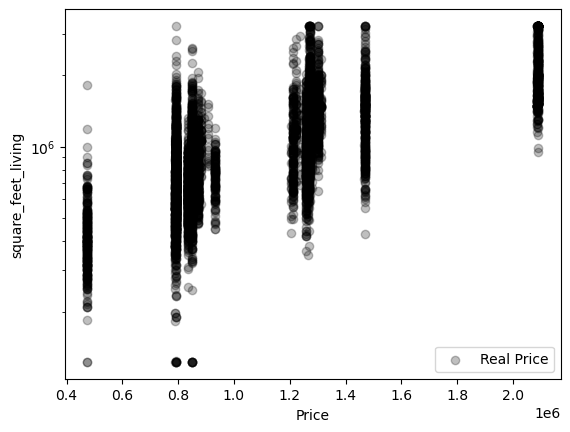

<Figure size 1500x1000 with 0 Axes>

In [144]:
adaboost_regressor = AdaBoostRegressor(n_estimators=1500, learning_rate = 0.001, loss='exponential')
ada_model = adaboost_regressor.fit(x_train, y_train)
prediction_test_ada = ada_model.predict(x_test)
# Apply the model we created using the training data to the test data, and calculate the RSS.
print('RSS',((y_test - prediction_test_ada) **2).sum())
# Calculate the RMSE (Root Mean Squared Error)
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test,prediction_test_ada)))
#Coefficient of determination R^2 of the prediction
print('The model\'s performance is %.2f\n' % ada_model.score(x_test, y_test))
# Plot 
plt.scatter(prediction_test_ada, y_test, color='black', alpha=0.25,label='Real Price')
#plt.plot(x_test_sort, ada_model.predict(x_test_sort.reshape(-1,1)),'g--',linewidth=3, label='AdaBoost regressor')
plt.xlabel('Price')
plt.ylabel('square_feet_living')
plt.legend()
plt.yscale('log')
plt.figure(figsize=(15,10))

plt.show()

In [134]:
adaboost_regressor = AdaBoostRegressor()

adaboost_regressor.fit(x_train,y_train)

AdaBoostRegressor()

In [135]:
adaboost_regressor.score(x_train,y_train)

0.31779198663451536

In [136]:
adaboost_regressor.score(x_test,y_test)

0.3130579837608206

In [138]:
adaboost_regressor2 = AdaBoostRegressor(n_estimators=1500, learning_rate = 0.001, loss='exponential')
adaboost_regressor2.fit(x_train, y_train)



AdaBoostRegressor(learning_rate=0.001, loss='exponential', n_estimators=1500)

In [139]:
adaboost_regressor2.score(x_train,y_train)

0.4961048079384499

In [141]:
adaboost_regressor2.score(x_test,y_test)

0.4972890362874699

#Train_Score: 0.5112879730394394 , test_Score: 0.5013137971436675-------Linear Regression
#Train Score 0.6804052201561209 ,Test Score 0.6482588587762217-------KNN Regressor
#Score on train:  0.711514819487135, Score on test : 0.6675297376436924-----DecisionTressRegression
#Score on train:  0.7009918073456035, Score on test : 0.6777094755047357-----Random Forest Regressor
#Score on train:  0.4961048079384499, Score on test : 0.4972890362874699-----Adabost Regressor

###Best model to implement the given data set is DecisomTressRegression/Random Forest Regressor